<a href="https://colab.research.google.com/github/ertgrulyksk/Weather-prediction/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("seattle-weather.csv")


In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [10]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

<Figure size 1296x432 with 0 Axes>

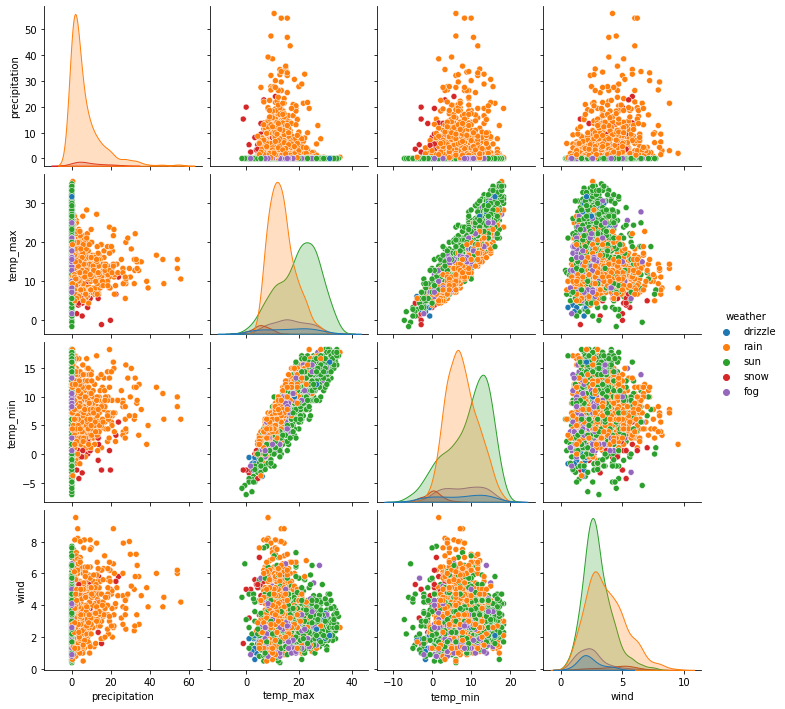

In [11]:
plt.figure(figsize=(18,6))
sns.pairplot(df.drop('date',axis=1),hue='weather')
plt.show()

In [12]:
df.replace(to_replace ="rain", value = 2, inplace = True)
df.replace(to_replace ="drizzle", value = 3, inplace = True)
df.replace(to_replace ="fog", value = 4, inplace = True)
df.replace(to_replace ="sun", value = 5, inplace = True)
df.replace(to_replace ="snow", value = 1, inplace = True)
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,3
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,4
1459,2015-12-30,0.0,5.6,-1.0,3.4,5


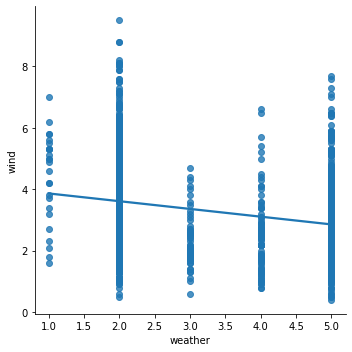

In [13]:
sns.lmplot(x='weather',y='wind', data=df, ci=None)

In [14]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [15]:
df = df.drop(columns=['date'])

In [16]:
df['weather'].value_counts()

2    641
5    640
4    101
3     53
1     26
Name: weather, dtype: int64

In [17]:
X=df.drop(columns=['weather'])
y=df['weather']

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
model.predict([[2.6,12.3,14.3,2.6]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.8033503])

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_a_score = model.score(X_test,y_test)
print(r2_a_score*100,'%')

46.16756682859208 %


In [23]:
from sklearn.linear_model import SGDClassifier
classifier_sgdc=SGDClassifier()
classifier_sgdc.fit(X_train, y_train)

SGDClassifier()

In [24]:
r2_a_score = classifier_sgdc.score(X_test,y_test)
print(r2_a_score*100,'%')

79.18088737201366 %


In [25]:
from sklearn.naive_bayes import GaussianNB

gas = GaussianNB()
gas.fit(X_train,y_train)

GaussianNB()

In [26]:
r2_a_score = gas.score(X_test,y_test)
print(r2_a_score*100,'%')

82.93515358361775 %
